In [19]:
import pandas as pd
import os

In [20]:
df = pd.read_csv('scores/aht_score.csv', index_col=0)
wis = df.loc['WISE-C']
df = df.loc['BRO_ah':].append(wis)
df = df.drop_duplicates()

In [21]:
df['diff (hours)'] = (df['old'] - df['prophet'])
diff = df[df['diff (hours)']>0]['diff (hours)']
diff

BRO_ah     8.891596
WISE-C    15.063516
Name: diff (hours), dtype: float64

In [22]:
hours_saved = diff.sum()

print('Daily aht Saved:',round(hours_saved,1))
print('Annual Savings:',"${:,.2f}".format(hours_saved * 262 * 25))

Daily aht Saved: 24.0
Annual Savings: $156,905.98


# approximately 71 seconds per day in aht savings
accross 262 business days at approximately `$25 per hour = $353,605 per year` in labor allocation cost savings across 'CS-National', 'RIS', 'PSG', 'CS-Maryland', 'CS-John-Hancock', 'WISE-Contractrual'

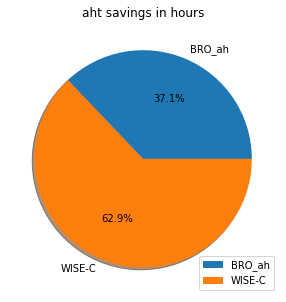

In [23]:
import matplotlib.pyplot as plt

df['diff (hours)'][df['diff (hours)']>0].plot.pie(autopct='%0.1f%%', figsize=(5, 5),
                                          shadow=True)
plt.title('aht savings in hours')
plt.ylabel('')
plt.legend(loc='lower right')
plt.show()